# Credit Rating Prediction Model

Author: Harvey Allen, Date: 18/01/2023

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

creditData = pd.read_csv('Data/creditData.csv')


In [ ]:
creditData.head()

In [ ]:
creditData.info()

In [4]:
creditData.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


## Data Cleaning

In [5]:
creditData = creditData.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['','_','-', '-333333333333333333333333333','nan', '__10000__','!@9#%8', '#F%$D@*&8', 'na'], np.NaN)

creditData['Age'] = creditData.Age.astype(str)
creditData['Age'] = creditData.Age.str.replace('-', '')

creditData['Credit_History_Age'] = creditData['Credit_History_Age'].str[:2]+""+creditData['Credit_History_Age'].str[13:15]

creditData['Monthly_Balance'] = creditData.Monthly_Balance.astype(float)
creditData['Amount_invested_monthly'] = creditData.Amount_invested_monthly.astype(float)
creditData['Total_EMI_per_month'] = creditData.Total_EMI_per_month.astype(float)
creditData['Credit_Utilization_Ratio'] = creditData.Credit_Utilization_Ratio.astype(float)
creditData['Monthly_Inhand_Salary'] = creditData.Monthly_Inhand_Salary.astype(float)
creditData['Annual_Income'] = creditData.Annual_Income.astype(float)
creditData['Outstanding_Debt'] = creditData.Outstanding_Debt.astype(float)
creditData['Num_of_Loan'] = creditData.Num_of_Loan.astype(float)
creditData['Num_of_Delayed_Payment'] = creditData.Num_of_Delayed_Payment.astype(float)
creditData['Changed_Credit_Limit'] = creditData.Changed_Credit_Limit.astype(float)

creditData['Age'] = creditData.Age.astype(float)

creditData['Monthly_Inhand_Salary']= creditData['Monthly_Inhand_Salary'].round(2)
creditData['Monthly_Balance'] = creditData['Monthly_Balance'].round(decimals = 2)
creditData['Amount_invested_monthly'] = creditData['Amount_invested_monthly'].round(decimals = 2)
creditData['Total_EMI_per_month'] = creditData['Total_EMI_per_month'].round(decimals = 2)
creditData['Credit_Utilization_Ratio'] =  creditData['Credit_Utilization_Ratio'].round(decimals = 2)
creditData['Monthly_Inhand_Salary'] = creditData['Monthly_Inhand_Salary'].round(decimals = 2)
creditData['Annual_Income'] = creditData['Annual_Income'].round(decimals = 2)

creditData.Age.replace(-500, np.median(creditData.Age), inplace=True)
for x in creditData.Age.values:
    if x > 110:
        creditData.Age.replace(x, np.NaN, inplace=True)

## Exploratory Data Analysis 

In [6]:
sns.set_palette("pastel")

In [7]:
categoricalData = ['Name', 'Month', 'Occupation', 'Type_of_Loan', 'Delay_from_due_date', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Changed_Credit_Limit', 'Credit_History_Age']
numericalData = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [8]:
for feature in categoricalData:
    print("column name :" + feature)
    print("Number of unique columns of " + feature, ": " + str(creditData[feature].nunique()))
    print("Values of unique columns of " + feature, "is below: " + str(creditData[feature].value_counts()))

column name :Name
Number of unique columns of Name : 10128
Values of unique columns of Name is below: Langep              44
Stevex              44
Jessicad            39
Vaughanl            39
Raymondr            38
                    ..
McBrideq             4
Yinka Adegokec       4
Josephine Masonz     4
Vellacotto           4
Timothyl             3
Name: Name, Length: 10128, dtype: int64
column name :Month
Number of unique columns of Month : 8
Values of unique columns of Month is below: January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
column name :Occupation
Number of unique columns of Occupation : 15
Values of unique columns of Occupation is below: Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     61

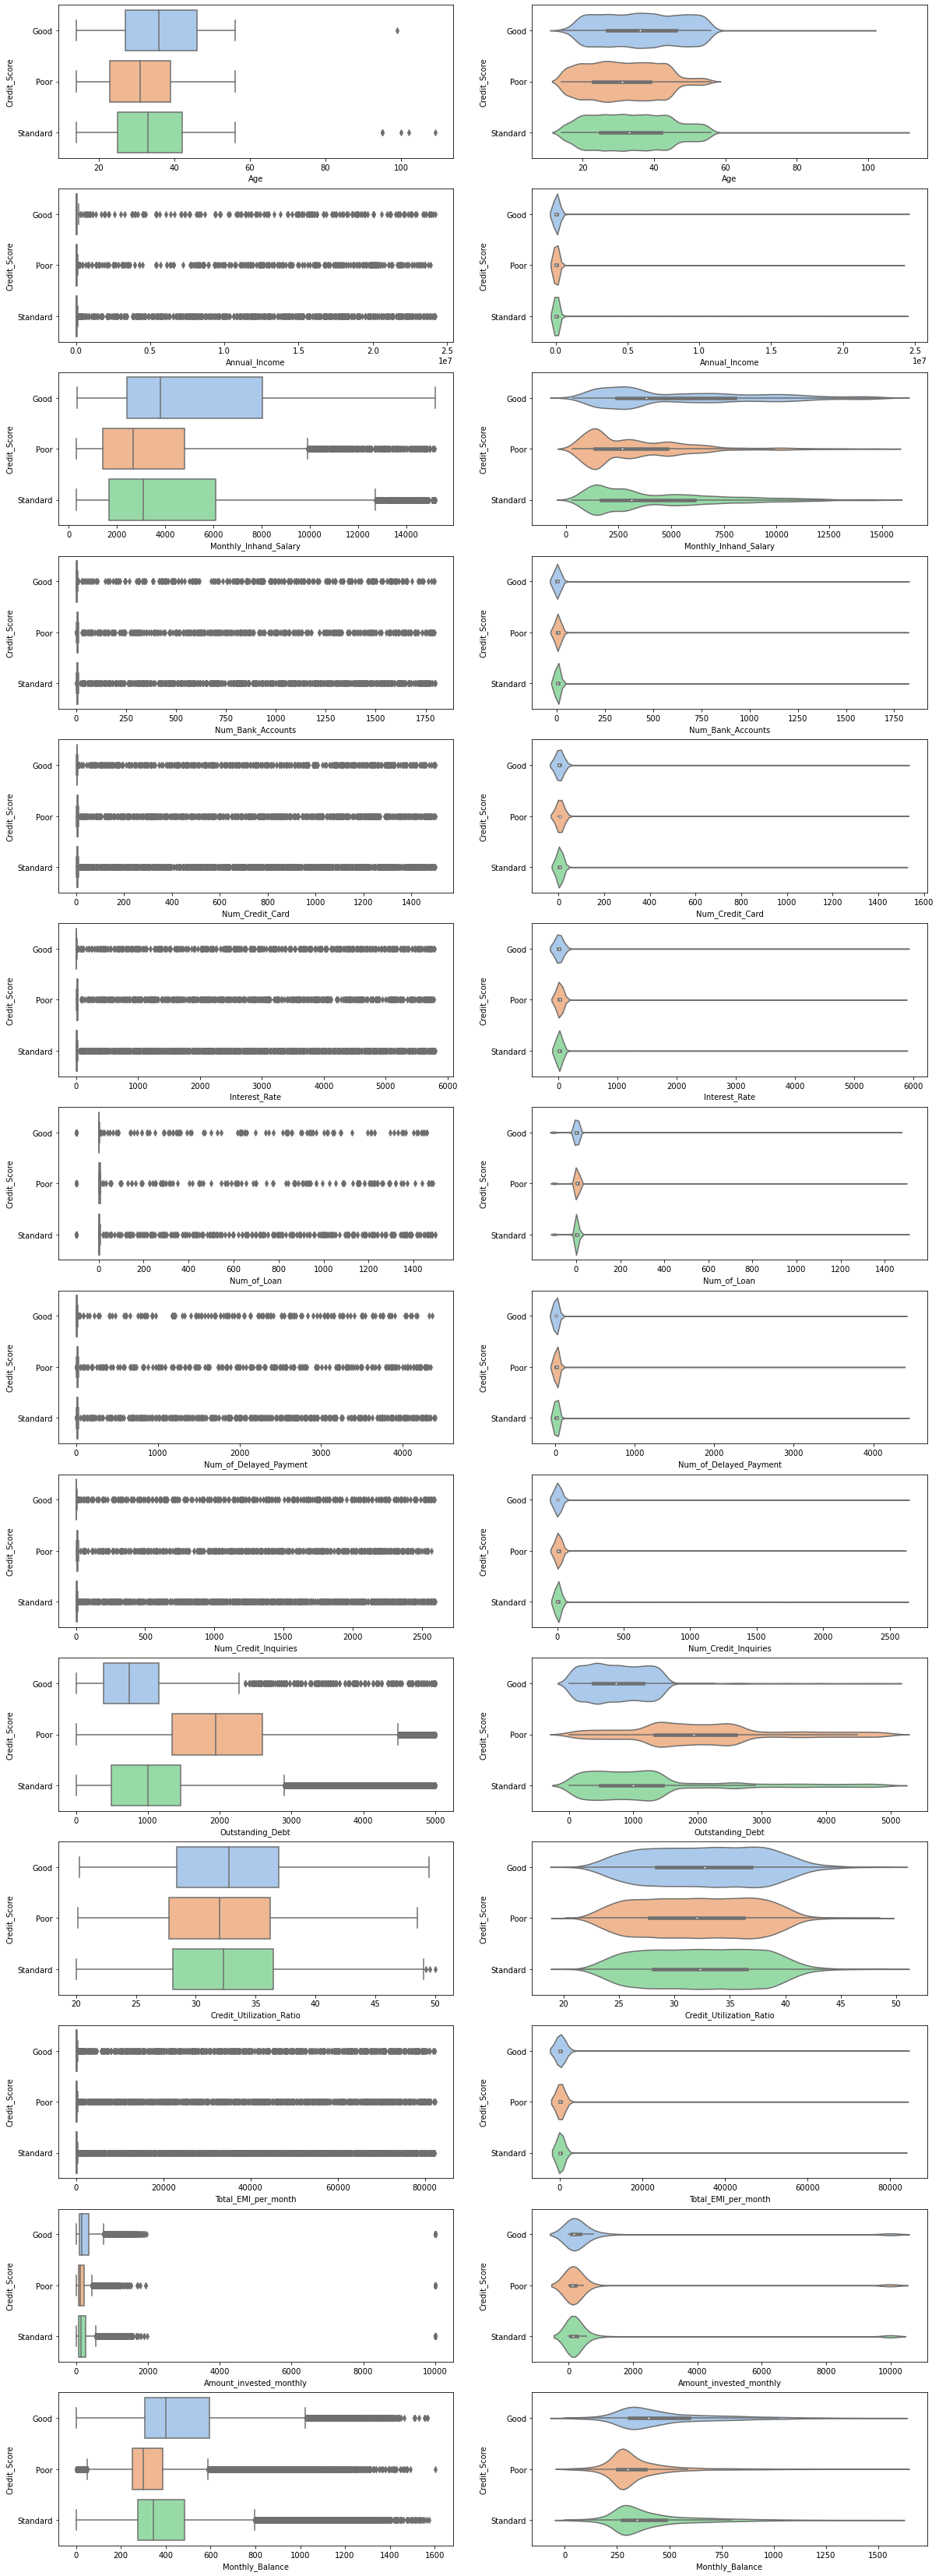

In [9]:
fig, axes = plt.subplots(len(numericalData), 2, figsize=(20, 60))

for col in range(0, len(numericalData)):
    sns.violinplot(ax=axes[col, 1], y=creditData['Credit_Score'].astype('category'), x=numericalData[col], data=creditData)
    sns.boxplot(ax=axes[col, 0], y=creditData['Credit_Score'].astype('category'), x=numericalData[col], data=creditData)
plt.show()

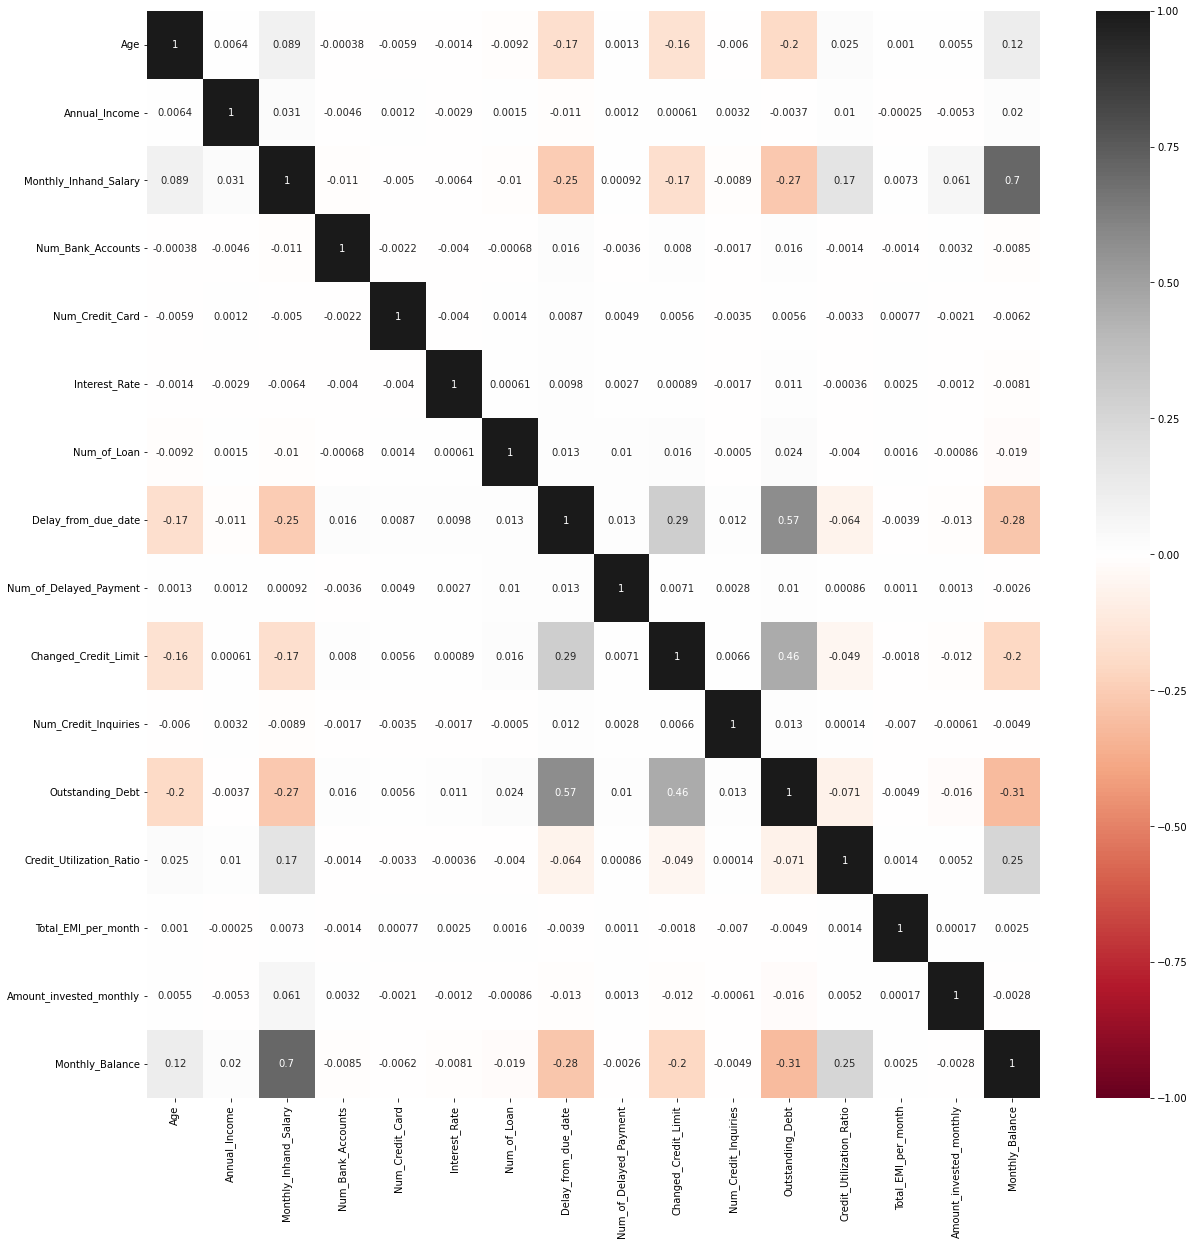

In [10]:
plt.figure(figsize=(20,20))
correlation = creditData.corr()
sns.heatmap(correlation, cmap='RdGy', annot=True, vmax=1, vmin=-1)
plt.show()

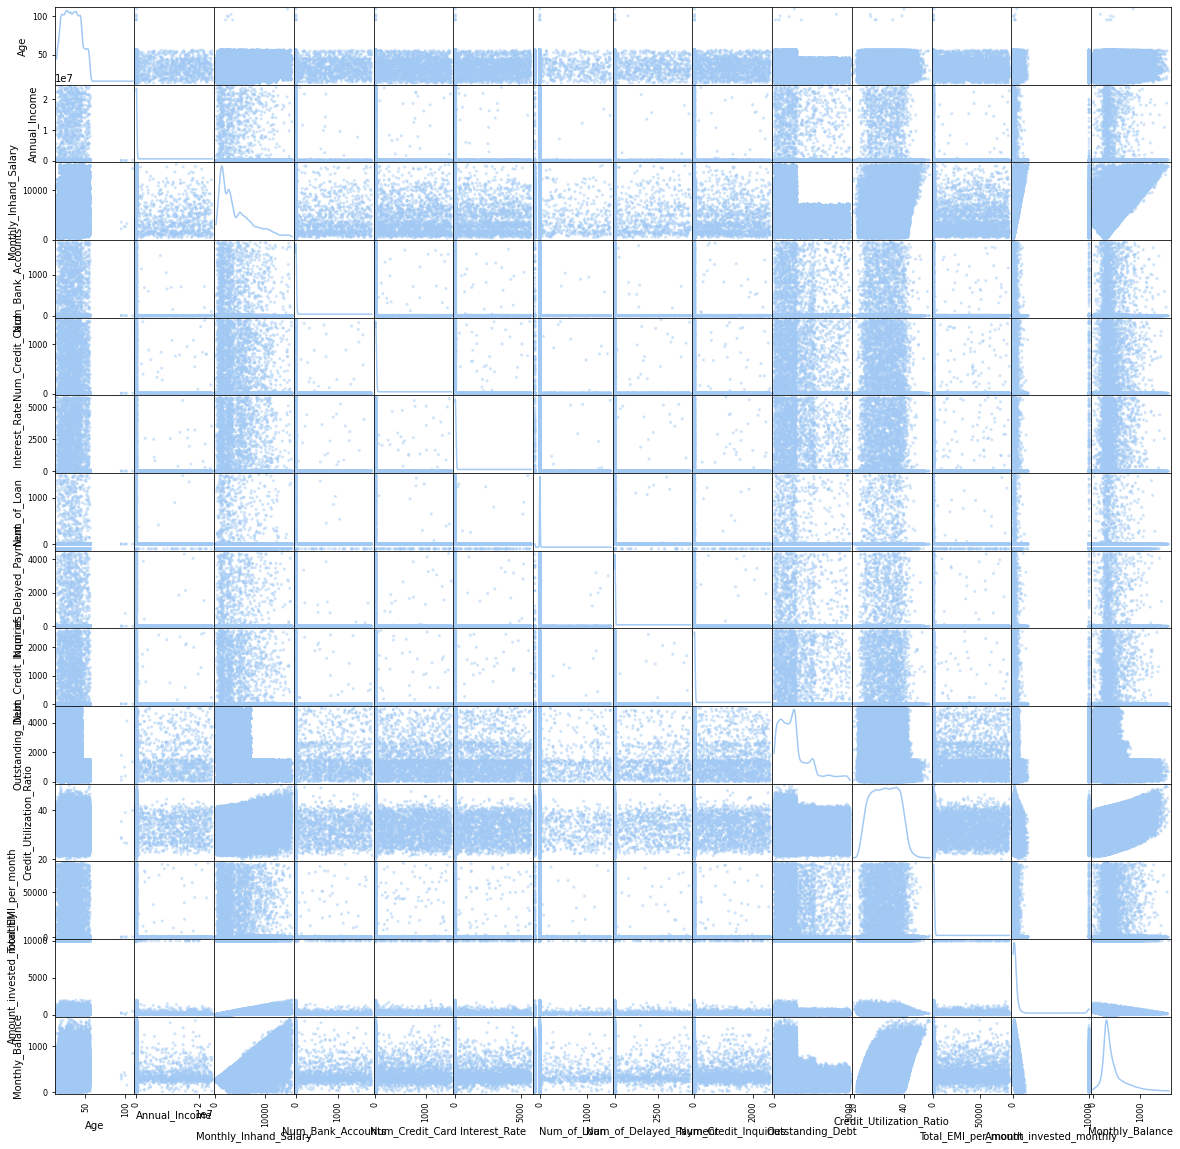

In [11]:
pd.plotting.scatter_matrix(creditData[numericalData], figsize=(20,20), diagonal='kde')
plt.show()

## Data Pre-Processing 

In [12]:
creditData.drop(columns=['ID', 'Customer_ID', 'SSN'])

,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Aaron Maashoh,23.0,Scientist,19114.12,1824.84,3,4,3,4.0,...,NaN,809.98,26.82,221,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,February,Aaron Maashoh,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good
2,March,Aaron Maashoh,NaN,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,28.61,223,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good
3,April,Aaron Maashoh,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.38,224,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
4,May,Aaron Maashoh,23.0,Scientist,19114.12,1824.84,3,4,3,4.0,...,Good,809.98,24.80,225,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,Nicks,25.0,Mechanic,39628.99,3359.42,4,6,7,2.0,...,NaN,502.38,34.66,316,No,35.10,60.97,High_spent_Large_value_payments,479.87,Poor
99996,May,Nicks,25.0,Mechanic,39628.99,3359.42,4,6,7,2.0,...,NaN,502.38,40.57,317,No,35.10,54.19,High_spent_Medium_value_payments,496.65,Poor
99997,June,Nicks,25.0,Mechanic,39628.99,3359.42,4,6,5729,2.0,...,Good,502.38,41.26,318,No,35.10,24.03,High_spent_Large_value_payments,516.81,Poor
99998,July,Nicks,25.0,Mechanic,39628.99,3359.42,4,6,7,2.0,...,Good,502.38,33.64,319,No,35.10,251.67,Low_spent_Large_value_payments,319.16,Standard


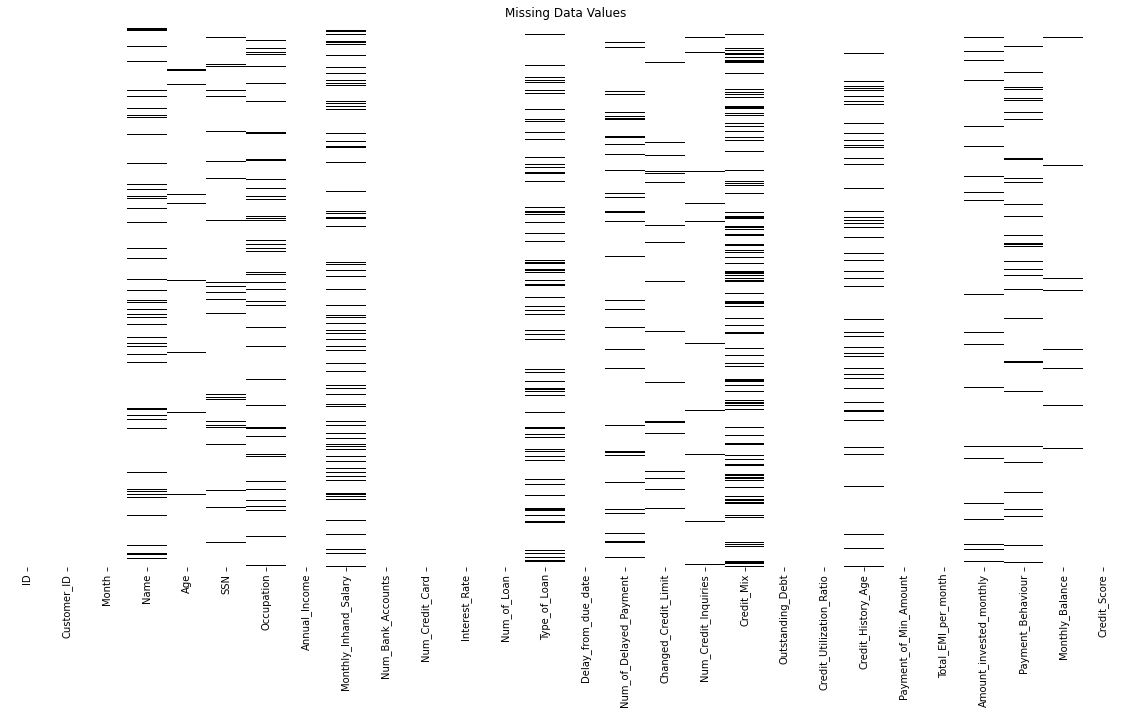

In [13]:
#Missing and Duplicate Data

plt.figure(figsize=(20,10))
sns.heatmap(creditData.isnull(), yticklabels=False, cbar=False, cmap='gray_r')
plt.title('Missing Data Values')
plt.show()

In [14]:
print('Missing Values Before:')
print(creditData.isnull().sum())
creditData = creditData[creditData.isnull().sum(axis=1) < 1] #Removes rows with >1 missing value
print('Missing Values After:')
print(creditData.isnull().sum())

Missing Values Before:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          2774
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64
Missing Valu

In [15]:
#Testing and Training Data

from sklearn.model_selection import train_test_split

creditX = creditData[categoricalData + numericalData]
creditY = creditData[['Credit_Score']]

#Test-Train split
x_train, x_test, y_train, y_test = train_test_split(creditX, creditY, test_size=0.3, random_state=0, stratify=creditY)

In [16]:
#Pre-processing Pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer

#Implementing transformation methods
categorical_transformer = Pipeline([('imputer_categoric', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
numeric_transformer = Pipeline([('imputer_numeric', SimpleImputer(strategy='mean')), ('imputer_num', KNNImputer(n_neighbors=2)), ('robust', RobustScaler()), ('standard', StandardScaler())])
preprocessor = ColumnTransformer([('categoricals', categorical_transformer, categoricalData), ('numericals', numeric_transformer, numericalData)], remainder = 'drop')

#Running features through the pre-processing pipeline
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

## Model Evaluation 

In [ ]:
#Hyper Parameter Optimisation 

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Outlining models and their equivilant parameter search areas
LRmodel = LogisticRegression(max_iter=5000) #Allow Convergence
LRparameters = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
DTmodel = DecisionTreeClassifier()
DTparameters = {'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12]}
SVMmodel = svm.LinearSVC(max_iter=5000) #Allow Convergence
SVMparameters = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}

modelParameters = {LRmodel:LRparameters, DTmodel:DTparameters, SVMmodel:SVMparameters}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1) #K-Fold cross validation method

#Optimal parameter search for each model
for model, parameters in modelParameters.items():
    search = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=cv)
    result = search.fit(x_train, np.ravel(y_train))
    print('Optimal Hyperparameters: ' + str(result.best_params_))

In [22]:
from sklearn.metrics import classification_report
from sklearn import svm

#Support Vector Machine Model Testing
SVMmodel = svm.LinearSVC(C=1, penalty='l2')
SVMmodel.fit(x_train, y_train)
y_predicted = SVMmodel.predict(x_test)

#Evaluation Metrics
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

        Good       0.69      0.67      0.68      1575
        Poor       0.74      0.74      0.74      3058
    Standard       0.76      0.77      0.76      5191

    accuracy                           0.74      9824
   macro avg       0.73      0.72      0.73      9824
weighted avg       0.74      0.74      0.74      9824



In [23]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

#Support Vector Machine Model Testing
LRmodel = LogisticRegression(C=10, penalty='l2')
LRmodel.fit(x_train, y_train)
y_predicted = LRmodel.predict(x_test)

#Evaluation Metrics
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

        Good       0.67      0.61      0.64      1575
        Poor       0.72      0.70      0.71      3058
    Standard       0.74      0.77      0.75      5191

    accuracy                           0.72      9824
   macro avg       0.71      0.69      0.70      9824
weighted avg       0.72      0.72      0.72      9824



In [24]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

#Decsion Tree Model Testing
DTmodel = DecisionTreeClassifier(criterion='gini', max_depth=12)
DTmodel.fit(x_train, y_train)
y_predicted = DTmodel.predict(x_test)

#Evaluation Metrics
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

        Good       0.54      0.66      0.60      1575
        Poor       0.69      0.70      0.70      3058
    Standard       0.76      0.70      0.73      5191

    accuracy                           0.69      9824
   macro avg       0.66      0.69      0.67      9824
weighted avg       0.70      0.69      0.70      9824



## Model Implementation

In [25]:
import pickle

model = svm.LinearSVC(C=1, penalty='l2')
model.fit(x_train, y_train)

#Download Model
filename = 'creditModel.sav'
pickle.dump(model, open(filename, 'wb'))


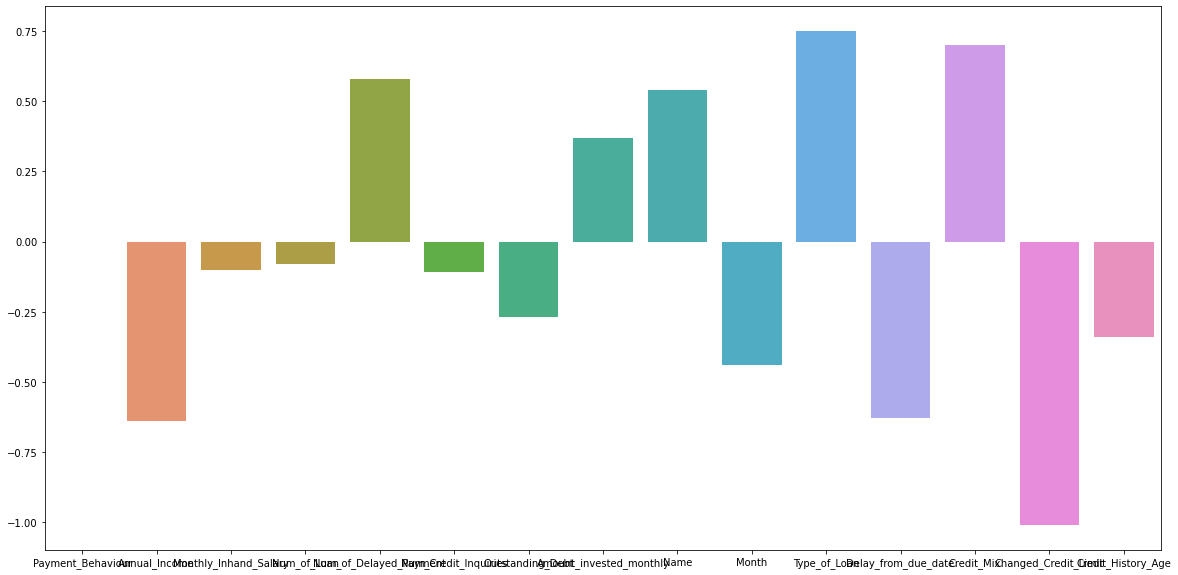

{0.0: 'Payment_Behaviour', -0.64: 'Annual_Income', -0.1: 'Monthly_Inhand_Salary', -0.08: 'Num_of_Loan', 0.58: 'Num_of_Delayed_Payment', -0.11: 'Num_Credit_Inquiries', -0.27: 'Outstanding_Debt', 0.37: 'Amount_invested_monthly', 0.54: 'Name', -0.44: 'Month', 0.75: 'Type_of_Loan', -0.63: 'Delay_from_due_date', 0.7: 'Credit_Mix', -1.01: 'Changed_Credit_Limit', -0.34: 'Credit_History_Age'}


In [46]:
#Feature Importance 

plt.figure(figsize=(20,10))

features = numericalData + categoricalData
featureValues = {}
for feature in range(len(features)):
    featureValues[round(model.coef_[0][feature], 2)] = features[feature]
sns.barplot(x=list(featureValues.values()), y=list(featureValues.keys()))
plt.show()
